In [ ]:
(수업 순서)

위키독스 스스로 읽어보기
https://wikidocs.net/

요약 정리하고 1명 발표하여 내용 정리하기

클래스로 만든 객체를 ‘인스턴스’라고도 한다. 그렇다면 객체와 인스턴스의 차이는 무엇일까? 이렇게 생각해 보자.

a = Cookie()로 만든 a는 객체이다. 그리고 a 객체는 Cookie의 인스턴스이다.

즉, 인스턴스라는 말은 특정 객체(a)가 어떤 클래스(Cookie)의 객체인지를 관계 위주로 설명할 때 사용한다. ‘a는 인스턴스’보다 ‘a는 객체’라는 표현이 어울리며 ‘a는 Cookie의 객체’보다 ‘a는 Cookie의 인스턴스’라는 표현이 훨씬 잘 어울린다.

In [ ]:
a객체, Cookie의 인스턴스

# 파이썬 클래스, 핵심만 제대로 익히기

In [ ]:
https://docs.google.com/document/d/1BO0B0ujOozpd58rae-mrDP3RxxskJ52Ix51L6TRul8Q/edit?tab=t.0

## 1) 객체·클래스·인스턴스

객체(Object): 데이터 + 동작의 묶음

클래스(Class): 객체를 만드는 설계도

인스턴스(Instance): 클래스로 찍어낸 실제 객체

In [1]:
class Dog:
    pass

d1 = Dog()  # 인스턴스 생성
print(isinstance(d1, Dog))  # True


True


### 연습: Cat 클래스를 만들고 인스턴스를 2개 생성해 타입을 확인.

## 2) __init__와 인스턴스 속성

생성자 __init__에서 인스턴스 변수를 초기화.

self는 “바로 그 인스턴스 자신”.

In [1]:
class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age  = age

d = Dog("Mango", 2)
print(d.name, d.age)


Mango 2


### self 설명

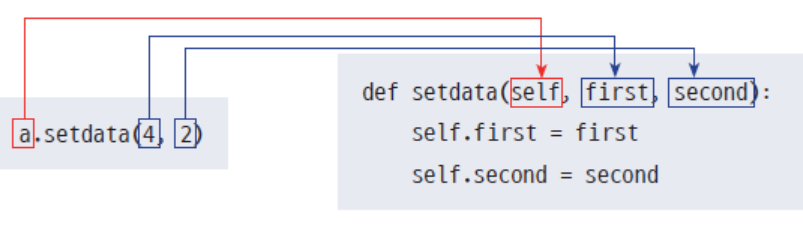

### 연습: Student(name, grade)를 만들고 name, grade 출력.

## 3) 인스턴스 메서드와 self

인스턴스 전용 동작.

In [2]:
class Counter:
    def __init__(self):
        self.value = 0
    def inc(self):
        self.value += 1

c = Counter()
c.inc(); c.inc()
print(c.value)  # 2


2


### 연습: Timer에 tick()을 만들어 호출할 때마다 초를 +1.

In [4]:
# 풀이 예시

class Timer1:
    def __init__(self):
        self.cnt = 0

    def tick(self):
        self.cnt += 1

t = Timer1()
t.tick()
t.tick()
print(t.cnt)

2


## 4) 클래스 변수 vs 인스턴스 변수

클래스 변수: 모든 인스턴스가 공유

인스턴스 변수: 각자 보유

In [6]:
class User:
    site_name = "클래스 변수"  # 클래스 변수
    def __init__(self, name):
        self.name = name   # 인스턴스 변수

u1, u2 = User("A"), User("B")
User.site_name = "인스턴스 변수"
print(u1.site_name, u2.site_name)  # 둘 다 인스턴스 변수 출력

인스턴스 변수 인스턴스 변수


### 연습: 생성된 사용자 수를 세는 count 클래스 변수(cls_cnt)를 추가해 증가시키기.

클래스 변수는 클래스명.변수명 또는 type(self).변수명으로 접근해야 안전합니다.

self.변수명으로 접근하면 인스턴스 변수로 바뀌는 함정에 주의해야 해요.

#### 실수 사례

In [14]:
class User:
    cls_cnt = 0
    def __init__(self, name):
        self.name = name
        self.cls_cnt = self.cls_cnt + 1  # ❌ 인스턴스 변수 생성됨

u1 = User("A")
u2 = User("B")
print(User.cls_cnt)  # 👉 0 (학생들이 흔히 당황)


0


In [13]:
class User:
    cls_cnt = 0
    def __init__(self, name):
        self.name = name
        self.cls_cnt += 1  # ❌ User.cls_cnt가 아닌 self.cls_cnt

u1 = User("A")
u2 = User("B")
print(User.cls_cnt)  # 👉 0
print(u1.cls_cnt)    # 👉 1 (의도와 다르게 동작)


0
1


클래스 변수(cls_cnt)는 모든 인스턴스가 공유하는 값을 만들 때 사용합니다.
“생성된 사용자 수”를 세려면, 객체가 생성될 때마다 클래스 변수가 증가하면 됩니다.

아래에 좋은 코드 예시와 학생들이 자주 하는 실수를 함께 정리해드릴게요.

#### 좋은 코드 예시

In [11]:
class User:
    cls_cnt = 0  # 클래스 변수

    def __init__(self, name):
        self.name = name
        User.cls_cnt += 1  # 클래스 변수 증가

# 테스트
u1 = User("Alice")
u2 = User("Bob")
print(User.cls_cnt)  # 👉 2
# User.cls_cnt로 직접 접근해서 증가시킴 → 명확하고 실수 적음.

2


#### cls 활용 (@classmethod)

In [12]:
class User:
    cls_cnt = 0

    def __init__(self, name):
        self.name = name
        self._increase_count()

    @classmethod
    def _increase_count(cls):
        cls.cls_cnt += 1

# 테스트
u1 = User("Alice")
u2 = User("Bob")
print(User.cls_cnt)  # 👉 2
# 클래스 메서드를 따로 만들어 두면, 나중에 유지보수/확장성이 좋아요.

2


In [ ]:
# 테스트

# 이런 형태의 코드보단 객체가 생성될 때마다 클래스 변수가 증가하는 것이 좋을 듯 
class Timer2:
    cls_cnt = 0
    def __init__(self):
        self.cnt = 0

    def tick(self):
        self.cnt += 1

t = Timer2()
print(t.cnt)
print(t.cls_cnt)
print(Timer2.cls_cnt)
Timer2.cls_cnt += 1
print(t.cls_cnt)
print(Timer2.cls_cnt)
t.tick()
t.tick()
print(t.cnt)

In [16]:
class User:
    cls_cnt = 0

    def __init__(self, name):
        self.name = name
        self._increase_count()

    @classmethod
    def _increase_count(cls):
        cls.cls_cnt += 1

# 테스트
u1 = User("Alice")
u2 = User("Bob")
print(User.cls_cnt)  # 👉 2

2


## 링크 (구글 문서) 참고내용 정리
https://docs.google.com/document/d/16ZzTffYJv23u2IHjgZ77UtUv5CvdmzRrnB9CXlbYzqQ/edit?tab=t.0